# Методы оптимизации, ДЗ 1
## Сазанович Владислав М3439, Вариант 110

In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
eps = 1e-6

def f(x):
    return np.exp(np.sqrt(x)) + 11 * np.exp(-11 * x)

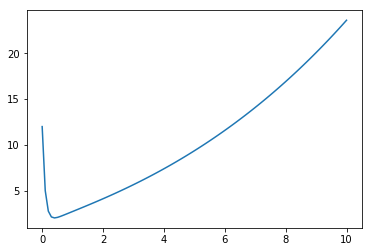

In [94]:
x = np.linspace(0, 10, 100)
y = f(x)
plt.plot(x, y)
plt.show()

In [95]:
LEFT = 0.
RIGHT = 2.

## Метод дихотомии

In [69]:
def dichotomy(f):
    l = LEFT
    r = RIGHT
    
    while (np.abs(r - l) / 2 > eps):
        # находим две центральные точки
        delta = (r - l) / 30
        m1 = (l + r) / 2 - delta
        m2 = (l + r) / 2 + delta
        
        # обновляем границы
        if f(m1) <= f(m2):
            r = m2
        else:
            l = m1
            
    return l, r

## Метод золотого сечения

In [91]:
def golden_ratio(f):
    l = LEFT
    r = RIGHT
    
    # Значения функции в промежуточных точках неизвестны
    f1 = None
    f2 = None
    
    while (np.abs(r - l) / 2 > eps):
        m1 = l + (3 - np.sqrt(5)) / 2 * (r - l)
        m2 = l + (np.sqrt(5) - 1) / 2 * (r - l)
        
        # Вычисляем f если нет значения с предыдущего шага
        if f1 is None:
            f1 = f(m1)
            
        # Вычисляем f если нет значения с предыдущего шага
        if f2 is None:
            f2 = f(m2)
            
        if f1 <= f2:
            r = m2
            f2 = f1
            f1 = None
        else:
            l = m1
            f1 = f2
            f2 = None
    
    return l, r

## Метод Фибоначчи

In [71]:
def fibonacci(f):
    l = LEFT
    r = RIGHT
    
    # Считаем числа Фибоначчи
    fib = [0, 1]
    while (fib[-1] < (r - l) / eps):
        fib.append(fib[-1] + fib[-2])
    n = len(fib) - 1
    
    # Считаем начальное приближение
    m1 = l + (r - l) * (fib[n - 2] / fib[n])
    f1 = f(m1)
    
    m2 = l + (r - l) * (fib[n - 1] / fib[n])
    f2 = f(m2)
    
    for k in range(1, n - 1):
        # Вычисляем f если нет значения с предыдущего шага
        if f1 is None:
            f1 = f(m1)
            
        # Вычисляем f если нет значения с предыдущего шага
        if f2 is None:
            f2 = f(m2)
            
        if f1 <= f2:
            r = m2
            m2 = m1
            m1 = l + (r - l) * (fib[n - k - 2] / fib[n - k])
            f2 = f1
            f1 = None
        else:
            l = m1
            m1 = m2
            m2 = l + (r - l) * (fib[n - k - 1] / fib[n - k])
            f1 = f2
            f2 = None
    
    return l, r

## Анализ производительности

### Парочка вспомогательных функций

In [72]:
# Функция которая оборачивает f для подсчета количества ее вызовов.
def perf(function, invocations):
    # Добавляет 1 к счетчику и вызывает function
    def invoke_f(x, invocations):
        invocations[0] += 1
        return function(x)
    
    # Возвращаем фунцкию f которая будет дополнительно считать количество вызовов
    return lambda x: invoke_f(x, invocations) 

In [73]:
# Функция которая запускает алгоритм и пишет результат красиво
def measure_function(algo, algo_name):
    invocations = [0]
    l, r = algo(perf(f, invocations))
    
    print("{}:\n    Результат: [{} .. {}] (delta = {}), Количество вызовов: {}".format(algo_name, l, r, r - l, invocations[0]))

### Сравнение алгоритмов

In [74]:
measure_function(dichotomy, "Метод дихотомии")

Метод дихотомии:
    Результат: [0.39272660260326164 .. 0.405819019295839] (delta = 0.01309241669257738), Количество вызовов: 16


In [75]:
measure_function(golden_ratio, "Метод золотого сечения")

Метод золотого сечения:
    Результат: [0.3869910099907467 .. 0.40325224750231337] (delta = 0.016261237511566662), Количество вызовов: 11


In [76]:
measure_function(fibonacci, "Метод Фибоначчи")

Метод Фибоначчи:
    Результат: [0.39484978540772536 .. 0.40343347639484983] (delta = 0.00858369098712447), Количество вызовов: 12
